In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random
from random import randint, choice

#-----------------
# PART I

def dip_evolve(initial_state, rule_number, dip_chance):
    '''
    :param last_cell_state: the array of ones and zeros that the evolution 
    function will calculate the new state of cells from
    
    :param rule_number: the decimal representation of one of the 256 possible ECA rules
    
    :param dip_chance: the probabily for an individual cell to undergo non-null evolution; 
    hence, diploid evolution
    '''
    # Convert rule to binary format:
    binary_rule = np.array([int(ch) for ch in np.binary_repr(rule_number, width=8)])
    # Create a new batch of blank cells:
    new_cells = [0]* len(initial_state)
    initial_shifted_left = np.roll(initial_state, -1)
    initial_shifted_right = np.roll(initial_state, 1)
    for i in range(len(initial_state)):
        # join together adjacent cells to form the neighborhood
        neighborhood = "".join((str(initial_shifted_right[i]), str(initial_state[i]), 
                     str(initial_shifted_left[i])))
        # considering the neighborhood as a binary number, we convert it to decimal reprsentation
        # i.e. three living cells: 111 --> 7
        deci_nbhd = int(neighborhood, 2) 
        if random.uniform(0,1) <= dip_chance: #The new_cells array is already zero in the case that the null 
            # rule should be applied, so no additional operation is needed.
            new_cells[i] = binary_rule[7-deci_nbhd] # Since the rule is ordered from highest power to lowest, 
            # we need to shift left towards earlier indices in the array if we are supposed to apply the 
            # rule for higher powers.
    return new_cells
  
    
def diploid_cellular_automata(n_cells, timesteps, rule_number, dip_chance):
    '''
    :param n_cells: number of total cells in the ring
    
    :param timesteps: total times that the ring of cells will undergo evolution
    
    :param rule_number: the decimal representation of one of the 256 possible ECA rules
    
    :param dip_chance: the probabily for an individual cell to undergo non-null evolution; 
    hence, diploid evolution
    '''
    # Set Initial Condition:
    cells = np.zeros((timesteps, n_cells), dtype=np.int8)
    cells[0, :] = np.array(np.random.rand(n_cells) < 0.5, dtype=np.int8)
    # Call evolution function 
    for i in range(timesteps - 1):
            cells[i + 1, :] = dip_evolve(cells[i, :], rule_number, dip_chance)
    return cells


def density(cells):
    '''
    :param cells: - a single "row" of cellular automata
    
    This function simply returns the fraction of cells which are living (so those with the value of 1).
    '''
    return np.sum(cells)/np.size(cells)


def density_vs_probability(n_cells, timesteps, rule_number, start_dip_chance, n_iterations, increment_size):
    '''
    :param n_cells: number of total cells in the ring
    
    :param timesteps: total times that the ring of cells will undergo evolution
    
    :param rule_number: the decimal representation of one of the 256 possible ECA rules
    
    :param start_dip_chance: the starting probabily for an individual cell to undergo non-null evolution; 
    hence, diploid evolution
    
    :param n_iterations: number of diploid chance values that will be tested
    
    :param increment_size: spacing between each diploid chance
    
    This function allows us to compare various density values for the same rule over varying the diploid chance paramter. 
    It also produces a graph of the final density versus the diploid chance paramter.
    '''
    final_densities = np.zeros(n_iterations)
    
    # produce evolutions over probability values
    for i in range(n_iterations):
        full_evolution_history = diploid_cellular_automata(n_cells, timesteps, rule_number, 
                                                           start_dip_chance + increment_size*i)
        final_densities[i] = density(full_evolution_history[timesteps - 1])
    
    # plot the final densities against each probability value
    plt.figure(figsize=(10,10))
    plt.plot(np.arange(start_dip_chance, start_dip_chance + increment_size*n_iterations, increment_size), final_densities)
    plt.title(f"Final densities after {timesteps} evolutions of {n_cells} cells over changing diploid probabilitues - rule = {rule_number}")
    plt.xlabel("Lambda")
    plt.ylabel("Density")
    
    return final_densities

              
def density_vs_cells(start_cells, timesteps, rule_number, dip_chance, n_iterations, increment_size):
    """
    :param start_cells: the starting number of total cells in the ring
    
    :param timesteps: total time that each ring of cells will undergo evolution
    
    :param rule_number: the decimal representation of one of the 256 possible ECA rules
    
    :param dip_chance: the probabily for an individual cell to undergo non-null evolution
        
    :param n_iterations: number of different sized rings that will be tested
    
    :param increment_size: increase in amount of cells for each ring
    
    This function allows us to compare final density values for the same rule over varying the size of the ring of cells. 
    It also produces a graph of the final densities versus number of cells of each ring.

    """
    final_densities = np.zeros(n_iterations)

    # produce evolutions over probability values
    for i in range(n_iterations):
        full_evolution_history = diploid_cellular_automata(start_cells + increment_size*i, timesteps, rule_number, 
                                                           dip_chance)
        final_densities[i] = density(full_evolution_history[timesteps - 1])
    
    # plot the final densities against ring size
    plt.figure(figsize=(10,10))
    plt.plot(np.arange(start_cells, start_cells + increment_size*n_iterations, increment_size), final_densities)
    plt.title(f"Final densities after {timesteps} timesteps for different sized rings: Rule = {rule_number}, Probability = {dip_chance}")
    plt.xlabel("Number of Cells")
    plt.ylabel("Density")
    
    return final_densities


# VISUALIZATION

def density_vs_time(full_evolution_history, rule_number):
    """
    :param full_evolution_history: An 2D array containing all the values of a group of cell's evolution.
    
    :param rule_number: The rule number that was used during the cell's evolution. Shows up in the plot.
    
    This function allows us to analyze the behavior of the density over time for a single run.
    """
    timesteps, n_cells = np.shape(full_evolution_history)
    densities = np.zeros(timesteps)
    for i in range(timesteps):
        densities[i] = density(full_evolution_history[i])
        
    # plot the density_vs_time graph
    plt.figure(figsize=(10,10))
    plt.plot(range(timesteps), densities)
    plt.title(f"The density of {n_cells} cells over {timesteps} timesteps - rule = {rule_number}")
    plt.xlabel("Time")
    plt.ylabel("Density")
    
    

def plot_cells(ca, title='', *, colormap='Greys', xlabel='', ylabel='time', show=True, **imshow_kwargs):
    """
    Plots the given cellular automaton.

    :param ca: the cellular automaton to plot

    :param title: the title to place on the plot (default is empty)

    :param colormap: the colormap to use (default is 'Greys')

    :param xlabel: the label of the x-axis (default is empty)

    :param ylabel: the label of the y-axis (default 'time')

    :param show: show the plot (default is True)

    :param imshow_kwargs: keyword arguments for the Matplotlib `imshow` function
    """
    cmap = plt.get_cmap(colormap)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.imshow(ca, interpolation='none', cmap=cmap, **imshow_kwargs)
    if show:
        plt.show()

array([0.889     , 0.8935    , 0.89333333, 0.87725   , 0.8818    ,
       0.89516667, 0.88928571, 0.88775   , 0.88655556, 0.894     ])

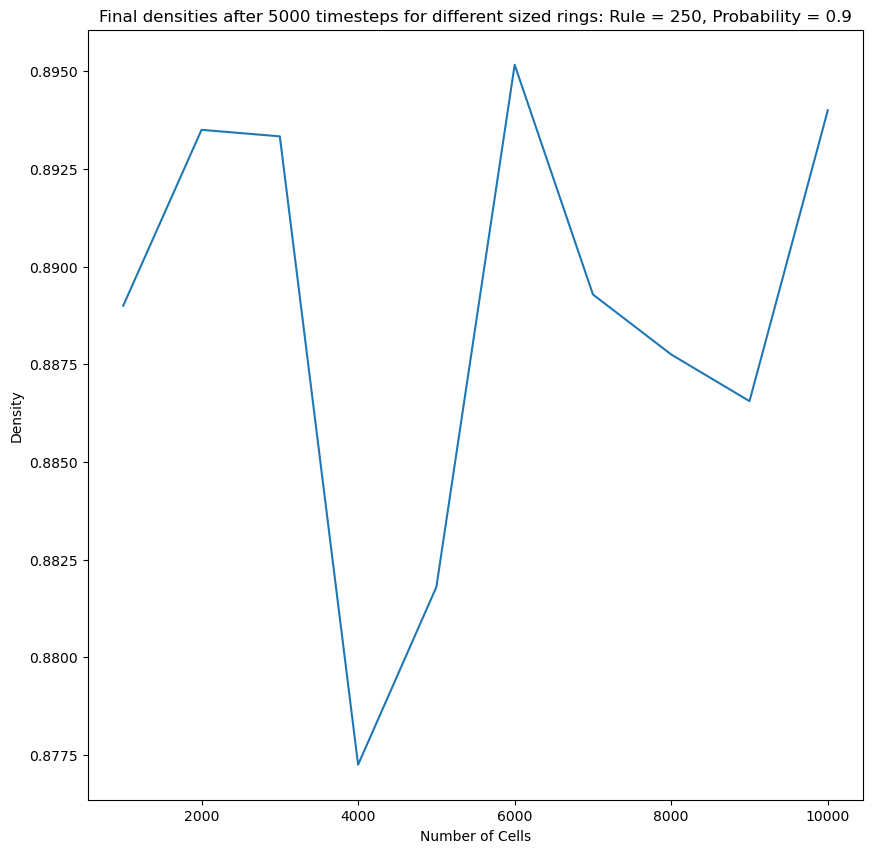

In [7]:
start_cells = 1000
timesteps = 5000
rule_number = 250
dip_chance = 0.9
n_iterations = 10
increment_size = 1000
density_vs_cells(start_cells, timesteps, rule_number, dip_chance, n_iterations, increment_size)

In [14]:
### Assign all parameter values:
n_cells = 10000
timesteps = 5000
rule_number = 250
dip_chance = 0.9 # for single run
start_dip_chance = 0.3 # for iterative run
n_iterations = 4
increment_size = 0.2


In [15]:
cell_history = diploid_cellular_automata(n_cells, timesteps, rule_number, dip_chance)

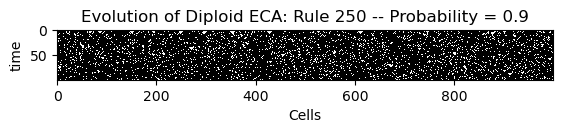

In [16]:
plot_cells(cell_history[0:100,0:1000], title=f"Evolution of Diploid ECA: Rule {rule_number} -- Probability = {dip_chance}", xlabel="Cells")

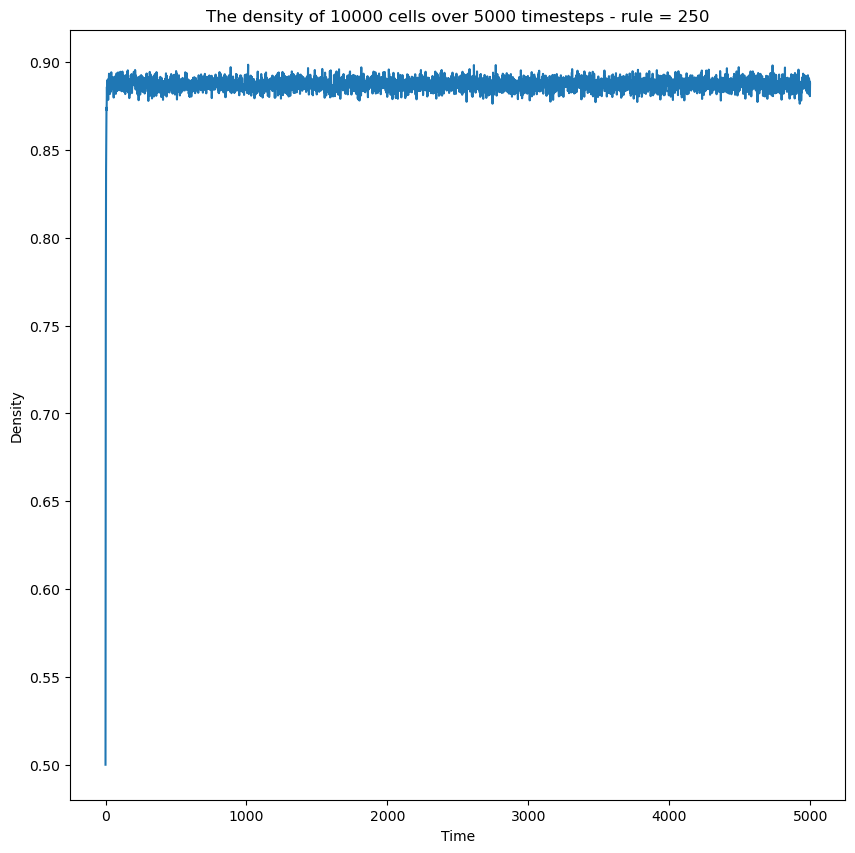

In [17]:
density_vs_time(cell_history, rule_number)

In [ ]:
density_vs_probability(n_cells, timesteps, rule_number, start_dip_chance, n_iterations, increment_size)

In [37]:
cells = np.array(np.random.rand(10) < 0.5, dtype=np.int8)
print(cells)

[1 0 0 0 1 0 1 0 0 1]
